In [ ]:
# load pandas untuk data wrangling
import pandas as pd
# load numpy untuk manipulasi vektor
import numpy as np
# load matplotlib untuk visualisasi data
import matplotlib.pyplot as plt
# load seaborn untuk visualisasi data
import seaborn as sns

# load metrics object dari sklearn
from sklearn import metrics
# load train-test data splitter
from sklearn.model_selection import train_test_split
# Import Decision Tree classifier (DT)
from sklearn.tree import DecisionTreeClassifier
# Import Logistic Regression classifier
from sklearn.linear_model import LogisticRegression
# load SVM classifier model
from sklearn.svm import SVC
# load KNN classifier model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler

#import for metrics
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

# Set the maximum number of columns and rows to display to a large number
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline

### Dataset Bank Customer Churn

In [ ]:
# load dataset ke raw_data
data = pd.read_csv('churn_prediction.csv')
# data['Churn'].replace(['Yes','No'],[1,0],inplace=True)
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

## Exploratory Data Analysis

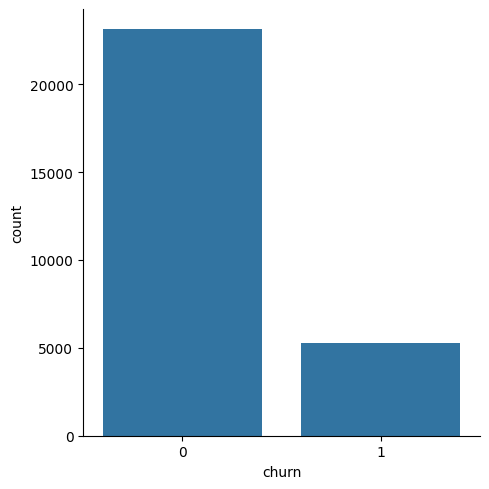

In [ ]:
# 1. Categorical Column
sns.catplot(x = "churn", kind = "count", data = data);

Disini saya menghitung jumlah nilai unik dalam kolom 'churn' dan kemudian dinormalisasi.

In [ ]:
data['churn'].value_counts(normalize=True)

churn
0    0.814671
1    0.185329
Name: proportion, dtype: float64

## **Categorical Data vs Churn**

In [ ]:
def proportional_aggregation(df, y, x):
    temp_df = df.groupby([y,x], as_index = False).size()
    temp_df['proportional'] = temp_df['size'] / temp_df.groupby(y)['size'].transform('sum')
    return temp_df

Disini saya membuat fungsi "proportional_aggregation" untuk menghitung proporsi relatif suatu nilai terhadap total dalam kategori pada data tertentu.

### Gender vs Churn

In [ ]:
temp_raw = data.groupby(['churn','gender'], as_index = False).size()
temp_raw

,churn,gender,size
0,0,Female,9324
1,0,Male,13379
2,1,Female,1985
3,1,Male,3169


In [ ]:
# temp_raw[temp_raw['gender'] == 'Male']['size'].sum() / temp_raw[temp_raw['gender'] == 'Female']['size'].sum()

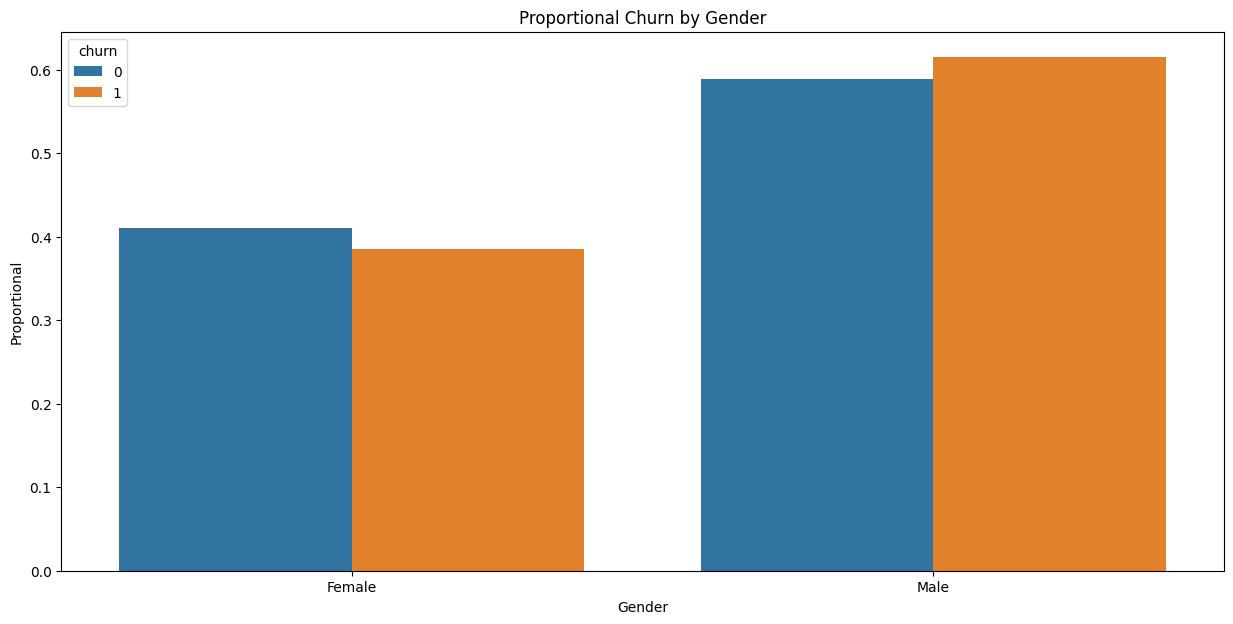

In [ ]:
data_proportional = proportional_aggregation(data, "churn", "gender")

plt.figure(figsize=(15, 7))
sns.barplot(x="gender", y="proportional", hue="churn", data=data_proportional)
plt.title("Proportional Churn by Gender")
plt.ylabel("Proportional")
plt.xlabel("Gender")
plt.show()

Dari barplot diatas terdapat 1,5 kali lebih banyak akun laki-laki dibandingkan akun perempuan.

### Occupation vs Churn

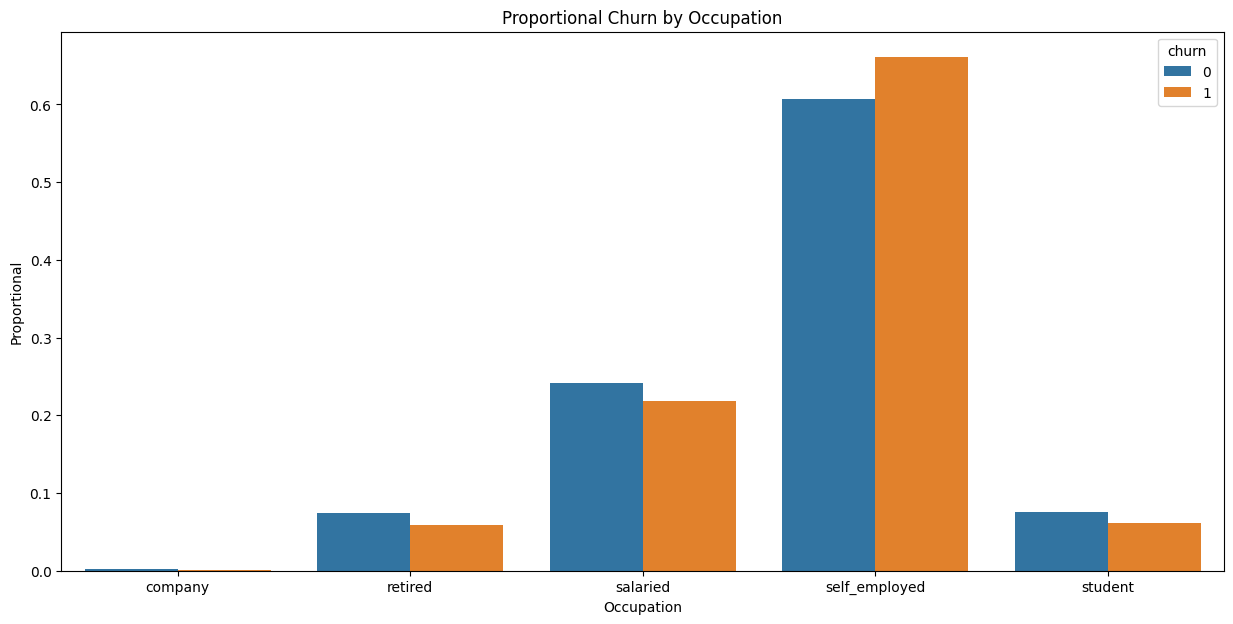

In [ ]:
data_proportional = proportional_aggregation(data, "churn", "occupation")

plt.figure(figsize=(15, 7))
sns.barplot(x="occupation", y="proportional", hue="churn", data=data_proportional)
plt.title("Proportional Churn by Occupation")
plt.ylabel("Proportional")
plt.xlabel("Occupation")
plt.show()

mayoritas individu dalam masyarakat memiliki pekerjaan sebagai wiraswasta. Pada saat yang sama, jumlah rekening perusahaan tercatat sangat sedikit. Perbedaan ini dapat menjadi fokus perhatian, terutama ketika melihat adanya transaksi yang tergolong sebagai outlier.

### Customer nw category vs Churn

In [ ]:
# data['customer_nw_category'].value_counts()

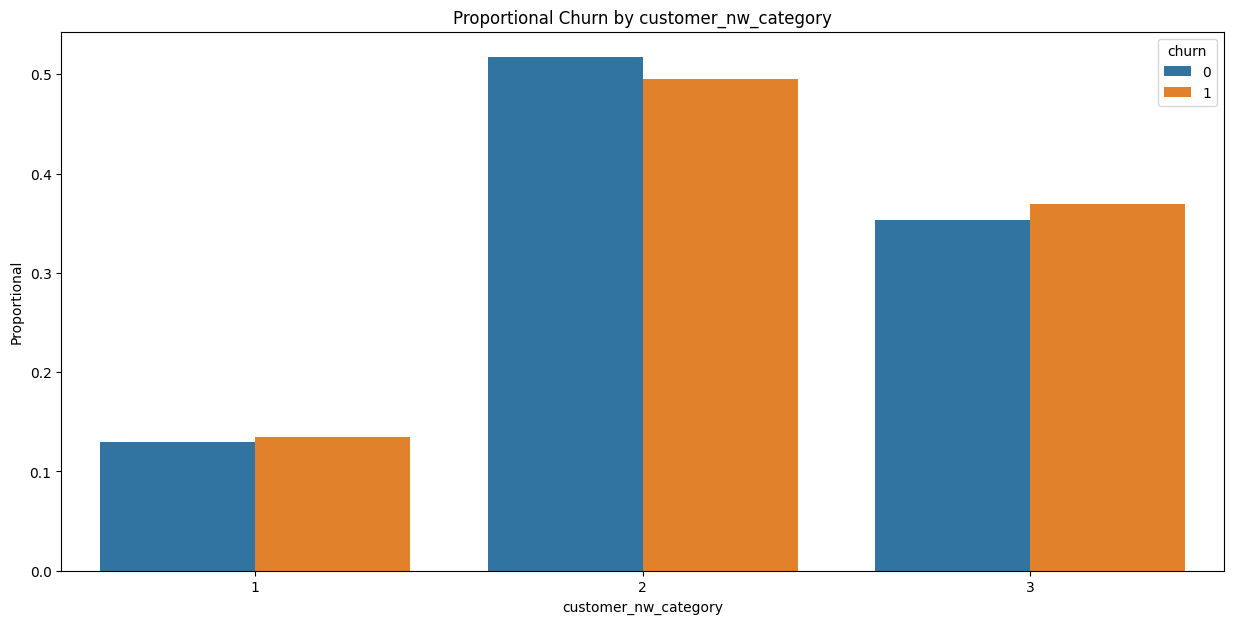

In [ ]:
data_proportional = proportional_aggregation(data, "churn", "customer_nw_category")

plt.figure(figsize=(15, 7))
sns.barplot(x="customer_nw_category", y="proportional", hue="churn", data=data_proportional)
plt.title("Proportional Churn by customer_nw_category")
plt.ylabel("Proportional")
plt.xlabel("customer_nw_category")
plt.show()

Bisa dilihat bahwa, kurang dari 15% termasuk dalam kategori kekayaan bersih tertinggi.

## **Numerical Data vs Churn**

### Age vs Churn

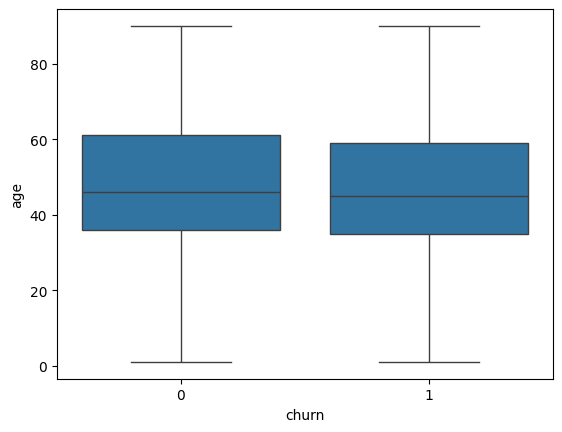

In [ ]:
# 2. numeric column
sns.boxplot(x = "churn", y = "age", data = data);

Usia sebagian besar pelanggan adalah sekitar 30 hingga 60 tahun

### Vintage vs Churn

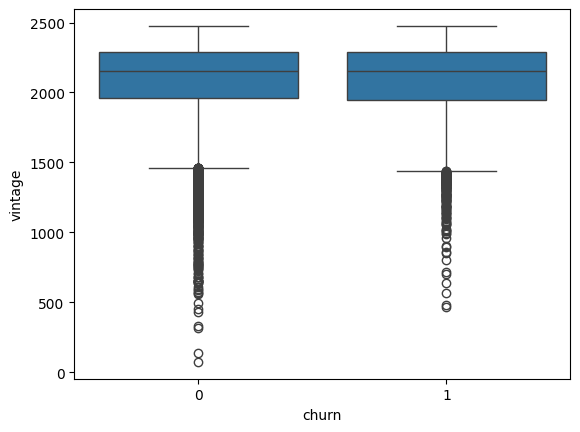

In [ ]:
sns.boxplot(x = "churn", y = "vintage", data = data);

sebagian besar pelanggan bergabung dalam rentang waktu sekitar 2100 hari sejak hari ekstraksi data. Hal ini mungkin mencerminkan pola pendaftaran atau keanggotaan yang umum terjadi pada periode tertentu, menunjukkan tren atau kecenderungan tertentu dalam waktu.

### Current month vs Churn

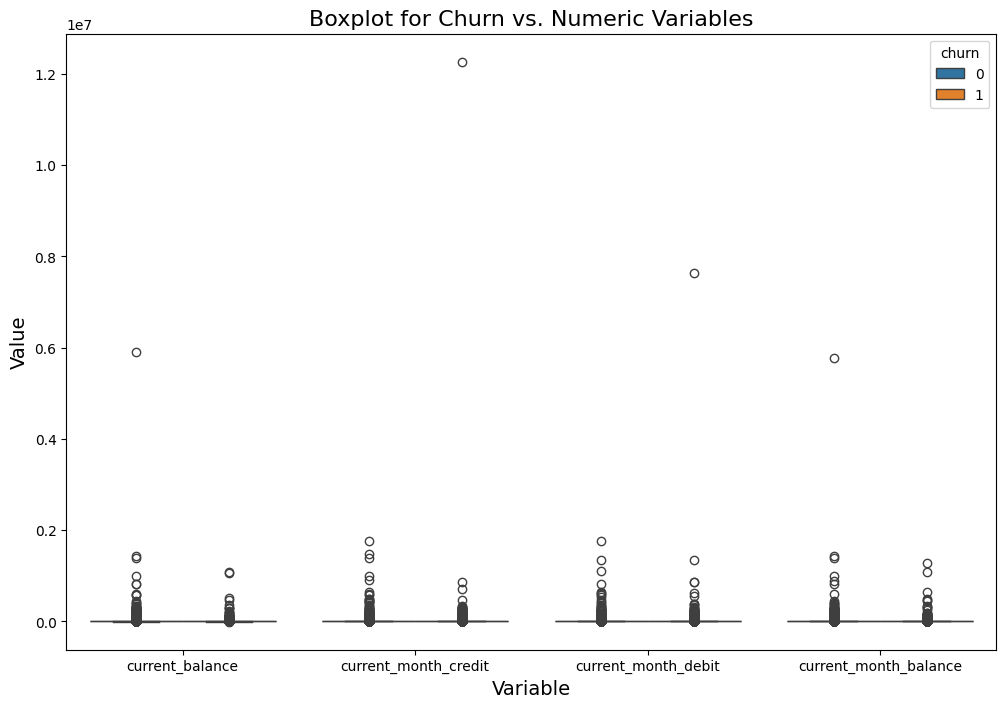

In [ ]:
boxplot_data = data[['churn', 'current_balance', 'current_month_credit', 'current_month_debit', 'current_month_balance']]

plt.figure(figsize=(12, 8))
sns.boxplot(x="variable", y="value", hue="churn", data=pd.melt(boxplot_data, id_vars="churn"))
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Boxplot for Churn vs. Numeric Variables', fontsize=16)
plt.show()


Plot di atas menunjukkan outlier yang sangat jelas dari semua kolom terhadap churn

### Previous Month vs Churn

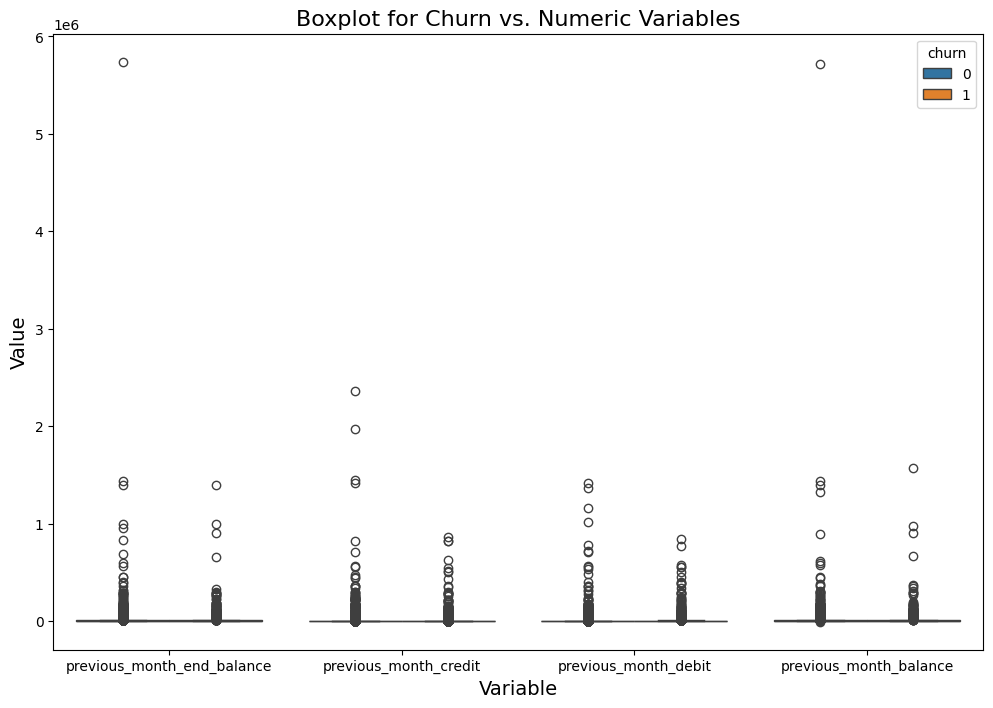

In [ ]:
boxplot_data = data[['churn', 'previous_month_end_balance', 'previous_month_credit', 'previous_month_debit', 'previous_month_balance']]

plt.figure(figsize=(12, 8))
sns.boxplot(x="variable", y="value", hue="churn", data=pd.melt(boxplot_data, id_vars="churn"))
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Boxplot for Churn vs. Numeric Variables', fontsize=16)
plt.show()

 Disini kita bisa lihat bahwa kebanyakan pelanggan melakukan transaksi dalam jumlah kecil.

### Previous quarters vs Churn

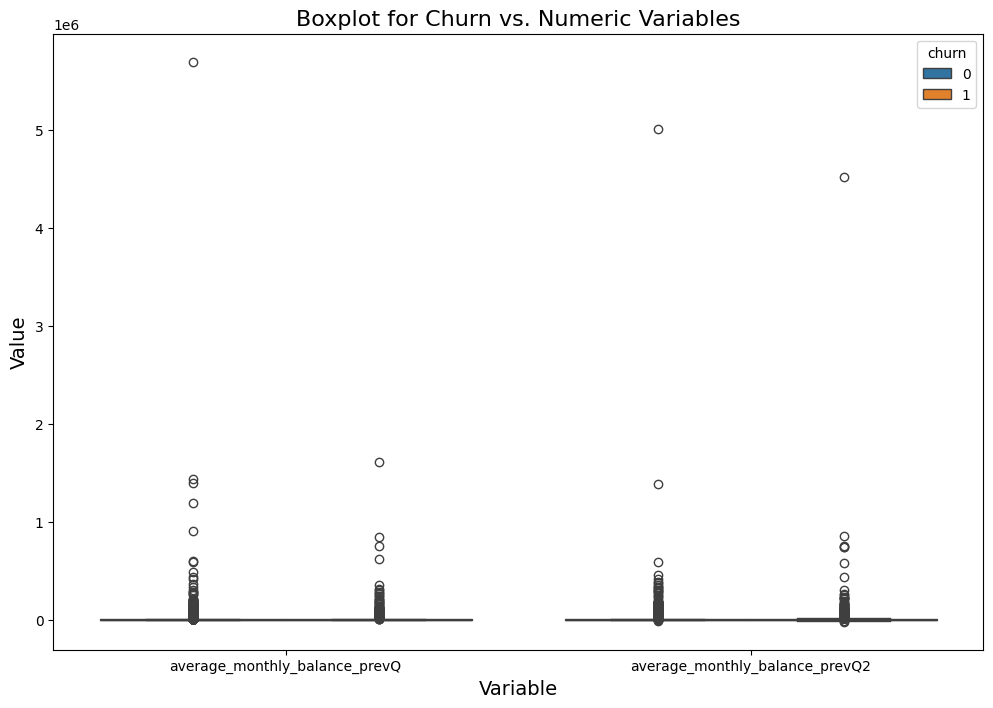

In [ ]:
boxplot_data = data[['churn', 'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']]

plt.figure(figsize=(12, 8))
sns.boxplot(x="variable", y="value", hue="churn", data=pd.melt(boxplot_data, id_vars="churn"))
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Boxplot for Churn vs. Numeric Variables', fontsize=16)
plt.show()

average_monthly_balance_prevQ dan average_monthly_balance_prevQ2 terlihat sama. Disini yang harus diperhatikan adalah, apakah ada kesamaan antara pelanggan yang melakukan transaksi dalam jumlah besar.

### Feature Engineering


In [ ]:
data.shape

(28382, 21)

In [ ]:
data['last_transaction'].value_counts()

last_transaction
NaT           3223
2019-12-31    1672
2019-12-28     831
2019-12-17     654
2019-12-27     632
2019-12-25     596
2019-12-26     576
2019-12-24     561
2019-12-20     486
2019-12-18     478
2019-12-22     476
2019-12-11     472
2019-12-10     468
2019-12-19     459
2019-12-14     447
2019-12-03     427
2019-12-12     408
2019-12-13     398
2019-12-07     398
2019-12-05     346
2019-12-08     341
2019-12-21     322
2019-12-04     318
2019-12-06     316
2019-11-26     238
2019-11-28     223
2019-11-30     218
2019-11-29     201
2019-11-21     193
2019-12-01     191
2019-11-23     184
2019-11-12     179
2019-11-13     173
2019-11-22     167
2019-11-19     164
2019-11-20     164
2019-11-08     160
2019-10-31     159
2019-11-14     153
2019-10-29     151
2019-11-15     144
2019-11-05     143
2019-11-01     136
2019-10-30     135
2019-11-06     133
2019-11-09     124
2019-11-16     117
2019-10-16     116
2019-09-27     115
2019-11-07     115
2019-11-17     114
2019-10-15    

In [ ]:
data = data[data['last_transaction'] != 'NaT'].reset_index(drop=True)

In [ ]:
data['last_transaction'] = pd.to_datetime(data['last_transaction'])

date = pd.DatetimeIndex(data['last_transaction'])

data['doy_ls_tran'] = date.dayofyear
data['moy_ls_tran'] = date.month
data['dow_ls_tran'] = date.dayofweek

In [ ]:
data = data.drop(columns = ['last_transaction'])
data.dtypes

customer_id                         int64
vintage                             int64
age                                 int64
gender                             object
dependents                        float64
occupation                         object
city                              float64
customer_nw_category                int64
branch_code                         int64
current_balance                   float64
previous_month_end_balance        float64
average_monthly_balance_prevQ     float64
average_monthly_balance_prevQ2    float64
current_month_credit              float64
previous_month_credit             float64
current_month_debit               float64
previous_month_debit              float64
current_month_balance             float64
previous_month_balance            float64
churn                               int64
doy_ls_tran                         int32
moy_ls_tran                         int32
dow_ls_tran                         int32
dtype: object

### Missing Value Handling

In [ ]:
data.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             461
dependents                        2167
occupation                          68
city                               685
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
doy_ls_tran                          0
moy_ls_tran                          0
dow_ls_tran                          0
dtype: int64

Ada nilai yang hilang di kolom gender, dependents, occupation, dan city

In [ ]:
data.dropna(inplace=True)

In [ ]:
data.isna().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
doy_ls_tran                       0
moy_ls_tran                       0
dow_ls_tran                       0
dtype: int64

### Outlier Handling

Disini saya menghapus outlier berdasarkan batasan faktor standar deviasi. Dalam hal ini, saya memuat faktor = 3 untuk menentukan batasan outliernya.

### Current month vs Churn

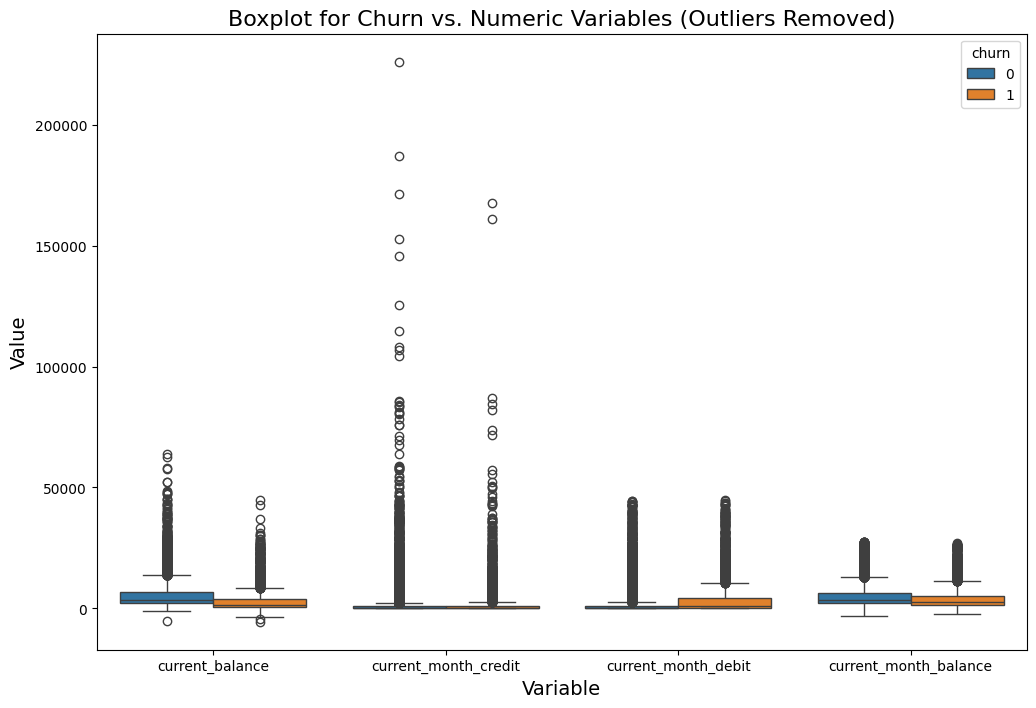

In [ ]:
factor = 3
numeric_variables = ['current_balance', 'current_month_credit', 'current_month_debit', 'current_month_balance']

cleaned_data = data.copy()

for variable in numeric_variables:
    cleaned_data = cleaned_data[abs(cleaned_data[variable] - cleaned_data[variable].mean()) < factor * cleaned_data[variable].std()]

boxplot_data_cleaned = cleaned_data[['churn'] + numeric_variables]

plt.figure(figsize=(12, 8))
sns.boxplot(x="variable", y="value", hue="churn", data=pd.melt(boxplot_data_cleaned, id_vars="churn"))
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Boxplot for Churn vs. Numeric Variables (Outliers Removed)', fontsize=16)
plt.show()

### Previous month vs Churn

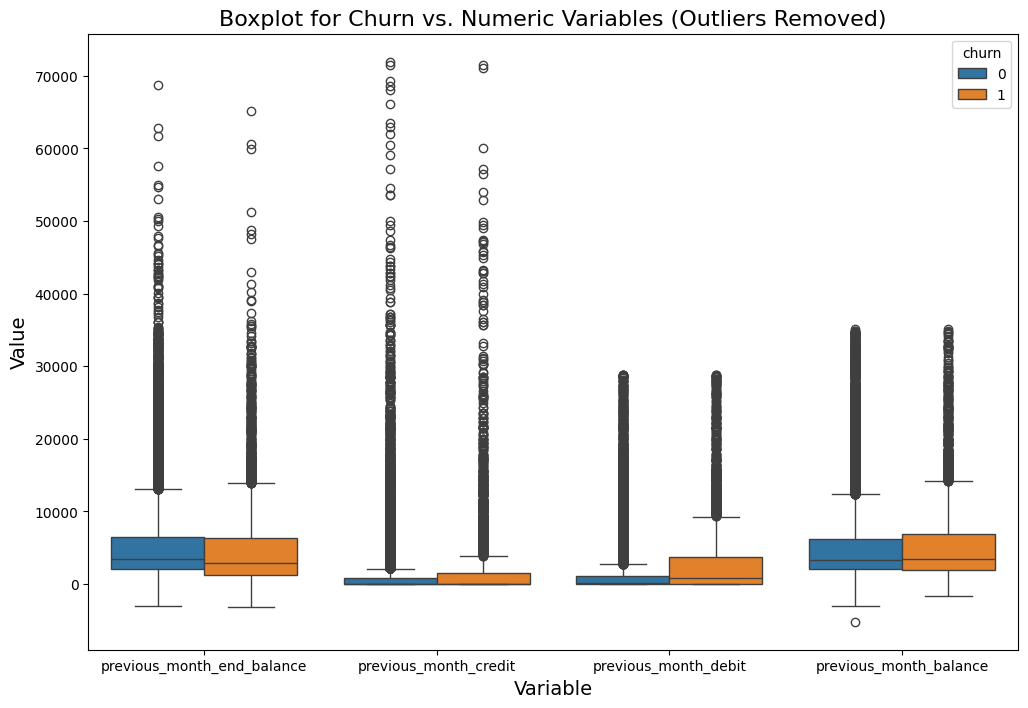

In [ ]:
factor = 3
numeric_variables = ['previous_month_end_balance', 'previous_month_credit', 'previous_month_debit', 'previous_month_balance']

cleaned_data = data.copy()

for variable in numeric_variables:
    cleaned_data = cleaned_data[abs(cleaned_data[variable] - cleaned_data[variable].mean()) < factor * cleaned_data[variable].std()]

boxplot_data_cleaned = cleaned_data[['churn'] + numeric_variables]

plt.figure(figsize=(12, 8))
sns.boxplot(x="variable", y="value", hue="churn", data=pd.melt(boxplot_data_cleaned, id_vars="churn"))
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Boxplot for Churn vs. Numeric Variables (Outliers Removed)', fontsize=16)
plt.show()

### Previous quarters vs Churn

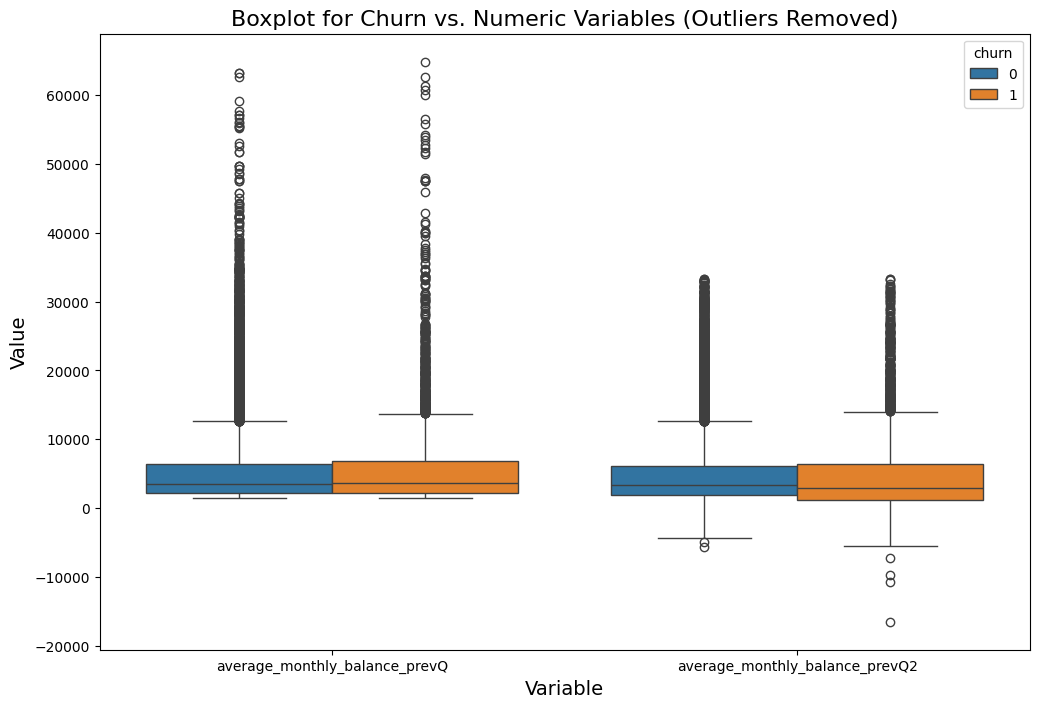

In [ ]:
factor = 3
numeric_variables = ['average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2']

cleaned_data = data.copy()

for variable in numeric_variables:
    cleaned_data = cleaned_data[abs(cleaned_data[variable] - cleaned_data[variable].mean()) < factor * cleaned_data[variable].std()]

boxplot_data_cleaned = cleaned_data[['churn'] + numeric_variables]

plt.figure(figsize=(12, 8))
sns.boxplot(x="variable", y="value", hue="churn", data=pd.melt(boxplot_data_cleaned, id_vars="churn"))
plt.xlabel('Variable', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Boxplot for Churn vs. Numeric Variables (Outliers Removed)', fontsize=16)
plt.show()

Outlier pada dua kuartal sebelumnya sangat mirip namun jumlahnya sangat besar.

### Encoding

Melakukan one-hot encoding pada data kategorikal pada kolom gender, occupation

In [ ]:
data = pd.get_dummies(data, drop_first=True, dtype=int)
data.head()

,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,moy_ls_tran,dow_ls_tran,gender_Male,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,2101,66,0.0,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,141,5,1,1,0,0,1,0
3,1579,42,2.0,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,307,11,6,1,0,0,1,0
4,1923,42,0.0,1096.0,2,1666,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,305,11,4,0,0,0,1,0
5,2048,72,0.0,1020.0,1,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,267,9,1,1,1,0,0,0
6,2009,46,0.0,623.0,2,317,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,193,7,4,1,0,0,1,0


In [ ]:
data.rename(columns={'gender_Male': 'gender'}, inplace=True)
data.head()

,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,moy_ls_tran,dow_ls_tran,gender,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,2101,66,0.0,187.0,2,755,1458.71,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,141,5,1,1,0,0,1,0
3,1579,42,2.0,1494.0,3,388,927.72,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,307,11,6,1,0,0,1,0
4,1923,42,0.0,1096.0,2,1666,15202.20,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,305,11,4,0,0,0,1,0
5,2048,72,0.0,1020.0,1,1,7006.93,7714.19,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,267,9,1,1,1,0,0,0
6,2009,46,0.0,623.0,2,317,10096.58,8519.53,6511.82,16314.17,0.27,0.27,443.13,5688.44,8563.84,5317.04,0,193,7,4,1,0,0,1,0


In [ ]:
data = data.drop(["customer_id"], axis = 1)

Variabel customer_id disini dapat dihilangkan karena identifier unik untuk setiap entitas dalam dataset.

### Train Test Split

In [ ]:
#Train test Split (train : tes = 80:20)
from sklearn.model_selection import train_test_split
train, test = train_test_split(data, test_size = 0.2, random_state=42)

In [ ]:
train.churn.value_counts(normalize=True)

churn
0    0.807172
1    0.192828
Name: proportion, dtype: float64

In [ ]:
test.churn.value_counts(normalize=True)

churn
0    0.8029
1    0.1971
Name: proportion, dtype: float64

## Mendefinisikan Model
Disini saya menggunakan 4 model, yaitu:
1. Logistic Regression
2. KNN
3. Decision Tree
4. SVM

In [ ]:
#split dataset to X_train, y_train, X_test, y_test
X_train = train.drop(columns=['churn'])
y_train = train['churn']
X_test = test.drop(columns=['churn'])
y_test = test['churn']

In [ ]:
y_train.value_counts(normalize=True)

churn
0    0.807172
1    0.192828
Name: proportion, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

churn
0    0.8029
1    0.1971
Name: proportion, dtype: float64

### Logistic Regression

In [ ]:
logistic_model = LogisticRegression(
    random_state = 42,
    class_weight = {0: 0.192828, 1:0.807172}
)

### KNN

In [ ]:
knn_clf = KNeighborsClassifier()

### Decision Tree

In [ ]:
dt_clf = DecisionTreeClassifier(
    random_state = 42,
    class_weight = {0: 0.192828, 1:0.807172}
)

### SVM

In [ ]:
svm_clf = SVC(
    random_state = 42,
    probability=True,
    class_weight = {0: 0.192828, 1:0.807172}
)

## Fitting Model to Data

### Logistic Regression

In [ ]:
logistic_model.fit(X_train, y_train)

c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight={0: 0.192828, 1: 0.807172}, random_state=42)

### KNN

In [ ]:
knn_clf.fit(X_train, y_train)

KNeighborsClassifier()

### Decision Tree

In [ ]:
dt_clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.192828, 1: 0.807172}, random_state=42)

### SVM

In [ ]:
svm_clf.fit(X_train, y_train)

SVC(class_weight={0: 0.192828, 1: 0.807172}, probability=True, random_state=42)

## Model Evaluasi

In [ ]:
def evaluate(model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train):
    y_pred_train = model.predict(x_train)
    print('======= Data Train =======')
    print('------')
    print('Confusion Matrix Data Train:')
    print()
    print(classification_report(y_train, y_pred_train))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_train, y_pred_train).ravel()
    print('Assuming 1 as positive, we get for Data Train:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy Data Train:', accuracy_score(y_train, y_pred_train))
    print('Precision Data Train:', precision)
    print('Recall Data Train:', recall)
    print('F1-Score Data Train:', 2 * (precision * recall)/(precision + recall))

    y_pred = model.predict(x_test)
    print('======= Data Test =======')
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')

    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)

    print('')

    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('Precision Data Test:', precision)
    print('Recall Data Test:', recall)
    print('F1-Score Data Test:', 2 * (precision * recall)/(precision + recall))

In [ ]:
X_train.shape

(17653, 24)

In [ ]:
X_test.shape

(4414, 24)

### Evaluasi Menggunakan Confusion Matrix

### Evaluasi Logistic Regression

In [ ]:
evaluate(logistic_model, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.90      0.80      0.85     14249
           1       0.43      0.62      0.50      3404

    accuracy                           0.77     17653
   macro avg       0.66      0.71      0.68     17653
weighted avg       0.81      0.77      0.78     17653

------
Assuming 1 as positive, we get for Data Train:

True Positive: 2094
True Negative: 11433
False Positive: 2816
False Negative: 1310

Accuracy Data Train: 0.7662720217526766
Precision Data Train: 0.4264765784114053
Recall Data Train: 0.6151586368977673
F1-Score Data Train: 0.5037286504690882
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.89      0.80      0.84      3544
           1       0.41      0.59      0.49       870

    accuracy                           0.76      4414
   macro avg       0.65      0.69      0.

### Evaluasi KNN

In [ ]:
evaluate(knn_clf, x_test = X_test.values, y_test = y_test, x_train=X_train.values, y_train=y_train)

c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.89      0.97      0.93     14249
           1       0.78      0.49      0.60      3404

    accuracy                           0.87     17653
   macro avg       0.83      0.73      0.76     17653
weighted avg       0.87      0.87      0.86     17653

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1663
True Negative: 13776
False Positive: 473
False Negative: 1741

Accuracy Data Train: 0.8745822239845918
Precision Data Train: 0.778558052434457
Recall Data Train: 0.48854289071680373
F1-Score Data Train: 0.6003610108303249


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.86      0.94      0.90      3544
           1       0.60      0.37      0.45       870

    accuracy                           0.83      4414
   macro avg       0.73      0.65      0.68      4414
weighted avg       0.81      0.83      0.81      4414

------
Assuming 1 as positive, we get:

True Positive: 318
True Negative: 3334
False Positive: 210
False Negative: 552

Accuracy: 0.8273674671499773
Precision Data Test: 0.6022727272727273
Recall Data Test: 0.36551724137931035
F1-Score Data Test: 0.45493562231759654


### Evaluasi Decision Tree

In [ ]:
evaluate(dt_clf, x_test = X_test, y_test = y_test, x_train=X_train, y_train=y_train)

======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14249
           1       1.00      1.00      1.00      3404

    accuracy                           1.00     17653
   macro avg       1.00      1.00      1.00     17653
weighted avg       1.00      1.00      1.00     17653

------
Assuming 1 as positive, we get for Data Train:

True Positive: 3404
True Negative: 14249
False Positive: 0
False Negative: 0

Accuracy Data Train: 1.0
Precision Data Train: 1.0
Recall Data Train: 1.0
F1-Score Data Train: 1.0
======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3544
           1       0.44      0.44      0.44       870

    accuracy                           0.78      4414
   macro avg       0.65      0.65      0.65      4414
weighted avg       0.78      0.78      0.78      4414

### Evaluasi SVM

In [ ]:
evaluate(svm_clf, x_test = X_test.values, y_test = y_test, x_train=X_train.values, y_train=y_train)

c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


======= Data Train =======
------
Confusion Matrix Data Train:

              precision    recall  f1-score   support

           0       0.87      0.89      0.88     14249
           1       0.51      0.46      0.48      3404

    accuracy                           0.81     17653
   macro avg       0.69      0.68      0.68     17653
weighted avg       0.80      0.81      0.81     17653

------
Assuming 1 as positive, we get for Data Train:

True Positive: 1574
True Negative: 12715
False Positive: 1534
False Negative: 1830

Accuracy Data Train: 0.8094374893785758
Precision Data Train: 0.5064350064350064
Recall Data Train: 0.46239717978848416
F1-Score Data Train: 0.4834152334152334


c:\Users\M S I\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


======= Data Test =======
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.87      0.88      0.87      3544
           1       0.48      0.45      0.46       870

    accuracy                           0.79      4414
   macro avg       0.67      0.66      0.67      4414
weighted avg       0.79      0.79      0.79      4414

------
Assuming 1 as positive, we get:

True Positive: 391
True Negative: 3117
False Positive: 427
False Negative: 479

Accuracy: 0.7947439963751699
Precision Data Test: 0.4779951100244499
Recall Data Test: 0.4494252873563218
F1-Score Data Test: 0.4632701421800947


### Membuat dataframe dari hasil evaluasi semua model

In [ ]:
def evaluate_model(model, x_train, y_train, x_test, y_test, model_name, evaluation_df):

    # Make predictions
    y_pred = model.predict(x_train)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_train, y_pred)
    precision = precision_score(y_train, y_pred)
    recall = recall_score(y_train, y_pred)
    f1 = f1_score(y_train, y_pred)

    # Add results to the evaluation DataFrame
    result = pd.DataFrame({
        'Model': [model_name + ' - Train'],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1]
    })

    evaluation_df = pd.concat([evaluation_df, result], ignore_index=True)

        # Make predictions
    y_pred = model.predict(x_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Add results to the evaluation DataFrame
    result = pd.DataFrame({
        'Model': [model_name + ' - Test'],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-Score': [f1]
    })

    evaluation_df = pd.concat([evaluation_df, result], ignore_index=True)

    return evaluation_df

In [ ]:
evaluation_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
evaluation_df = evaluate_model(logistic_model, X_train,y_train,
                               X_test,y_test,'LogReg',evaluation_df)
evaluation_df = evaluate_model(knn_clf, X_train,y_train,
                               X_test,y_test,'knn',evaluation_df)
evaluation_df = evaluate_model(dt_clf, X_train,y_train,
                               X_test,y_test,'dt',evaluation_df)
evaluation_df = evaluate_model(svm_clf, X_train,y_train,
                               X_test,y_test,'svm',evaluation_df)
evaluation_df

,Model,Accuracy,Precision,Recall,F1-Score
0,LogReg - Train,0.766272,0.426477,0.615159,0.503729
1,LogReg - Test,0.755324,0.414773,0.587356,0.486204
2,knn - Train,0.874582,0.778558,0.488543,0.600361
3,knn - Test,0.827367,0.602273,0.365517,0.454936
4,dt - Train,1.000000,1.000000,1.000000,1.000000
5,dt - Test,0.777073,0.435811,0.444828,0.440273
6,svm - Train,0.809437,0.506435,0.462397,0.483415
7,svm - Test,0.794744,0.477995,0.449425,0.463270


Dari hasil 4 model diatas terlihat recall yang lebih baik yaitu regresi logistik dengan train 61.51% dan test 58.73%.
kemudian saya menggunakan regresi logistik untuk menghitung potensi keuntungan bisnis.

### Cumulative Gain Plot

You should consider upgrading via the 'c:\users\m s i\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

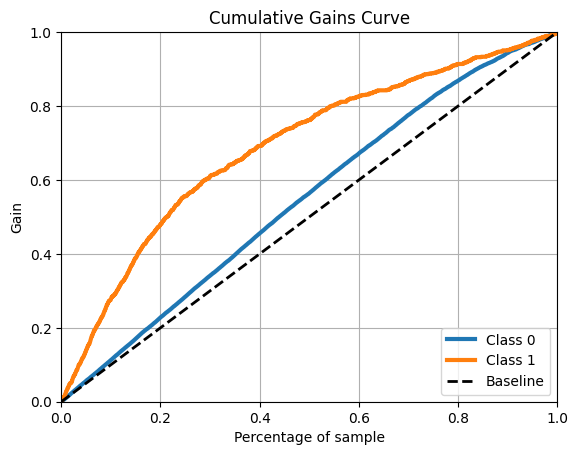

In [ ]:
# load scikitplot untuk visualisasi metrik
### logistic_regression -> diambil yang paling best model
!pip install scikit-plot
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(y_test, logistic_model.predict_proba(X_test))
#plot_cumulative_gain(y_actual, y_prediksi)

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

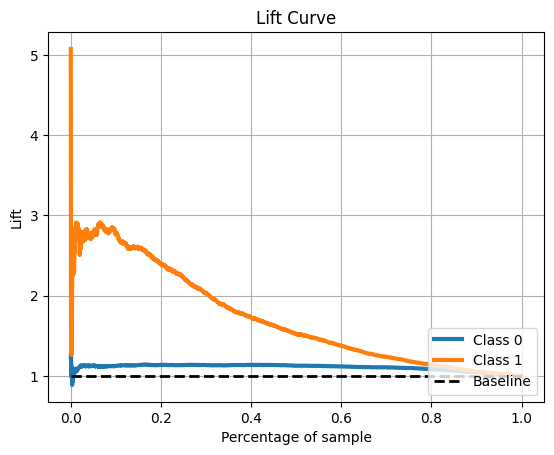

In [ ]:
skplt.metrics.plot_lift_curve(y_test, logistic_model.predict_proba(X_test))

In [ ]:
from sklearn.metrics import confusion_matrix
def value_prediction(y_actual, y_prediction):
    tn, fp, fn, tp = confusion_matrix(y_actual, y_prediction).ravel()
    print('TN :',tn)
    print('TP :',tp)
    print('FN :',fn)
    print('FP :',fp)

In [ ]:
value_prediction(y_test, logistic_model.predict(X_test))

TN : 2823
TP : 511
FN : 359
FP : 721


In [ ]:
def get_value(y_actual, y_prediction):
    tn, fp, fn, tp = confusion_matrix(y_actual, y_prediction).ravel()
    return tn, fp, fn, tp

Menggunakan metrik klasifikasi dapat membantu menganalisis performa model, terutama dalam konteks prediksi kelas.
- class_1 adalah total prediksi model yang termasuk dalam kelas positif, baik yang benar-benar positif maupun yang sebenarnya negatif tetapi salah diprediksi sebagai positif.
- class_0 mencakup semua prediksi yang seharusnya kelas 0 (negatif), baik yang benar-benar diklasifikasikan dengan benar maupun yang salah diklasifikasikan sebagai kelas 1.

In [ ]:
tn, fp, fn,tp = get_value(y_test, logistic_model.predict(X_test))
class_1 = tp+fp
print('Prediksi AI-ML kelas 1 (churn) :', class_1)
class_0 = tn+fn
print('Prediksi AI-ML kelas 0 (churn) :', class_0)

Prediksi AI-ML kelas 1 (churn) : 1232
Prediksi AI-ML kelas 0 (churn) : 3182


In [ ]:
# sama kaya data diatas
y_pred = pd.DataFrame(logistic_model.predict(X_test))
y_pred.value_counts()

0    3182
1    1232
Name: count, dtype: int64

In [ ]:
print('total data pada X_test :', 1232+3182)

total data pada X_test : 4414


In [ ]:
print(f'total populasi : {len(X_test)} orang')
print(f'50% sample keseluruhan kelas 1 dan 0 : {0.5 * len(X_test)} orang')
print(f'Jumlah % responders (Gain) yang berpotensi churn :, {0.79 * class_1} orang')

total populasi : 4414 orang
50% sample keseluruhan kelas 1 dan 0 : 2207.0 orang
Jumlah % responders (Gain) yang berpotensi churn :, 973.2800000000001 orang


In [ ]:
print('1 = orang yang churn')
print('0 = orang yang Tidak churn')
print('Tapi faktanya, setelah kita lakukan promosi direntang waktu tertentu yg kita dapatkan hasil seperti ini : ')
y_test.value_counts()

1 = orang yang churn
0 = orang yang Tidak churn
Tapi faktanya, setelah kita lakukan promosi direntang waktu tertentu yg kita dapatkan hasil seperti ini : 


churn
0    3544
1     870
Name: count, dtype: int64

In [ ]:
print(f'Faktanya Orang yang Tidak churn (Failed Prediction) : ,{0.79 * class_1 - 870} orang')
print(f'Orang yang benar-benar churn ialah : {870} orang' )
print('Selain itu secara lift chart, dengan 50% sample kita hampir dapat 2x performa lebih baik daripada pengambilan random dari hasil prediksi')

Faktanya Orang yang Tidak churn (Failed Prediction) : ,103.28000000000009 orang
Orang yang benar-benar churn ialah : 870 orang
Selain itu secara lift chart, dengan 50% sample kita hampir dapat 2x performa lebih baik daripada pengambilan random dari hasil prediksi


In [ ]:
#data actual
np.array(y_test)

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [ ]:
#Value Prediction
logistic_model.predict(X_test)

array([1, 0, 0, ..., 1, 0, 0], dtype=int64)

### Performa random sampling (pengambilan acak dari customer yg berpotensi churn)

In [ ]:
# Dari gain chart diatas, kalau kita ambil 40% sampling maka kita akan mendapat 40% responden churn customer
# Maka kemungkinan kita hanya mendapat :

print(f'orang yang churn ada : , {0.5 * class_1} orang')
print(f'Faktanya Orang yang Tidak churn (Failed Prediction) : {0.5 * class_1 - 870} orang')
print(f'Dengan potensi lift chartnya ialah 1x saja dengan pengambilan random dari hasil prediksi')

orang yang churn ada : , 616.0 orang
Faktanya Orang yang Tidak churn (Failed Prediction) : -254.0 orang
Dengan potensi lift chartnya ialah 1x saja dengan pengambilan random dari hasil prediksi


### Link Postingan Linkedin : https://www.linkedin.com/posts/naurah-nazhifah-73a936234_google-colaboratory-activity-7164603251240132608-NMPG?utm_source=share&utm_medium=member_desktop